# Exercises

Exercises you can try with Pandas DataFrames and Series:

1. Load a CSV file into a Pandas DataFrame and display the first 5 rows.
2. Filter the DataFrame to only show rows where a certain column meets a specific condition.
3. Create a new column in the DataFrame that is calculated as a combination of two existing columns.
4. Group the DataFrame by a certain column and aggregate the data using a function like sum or mean.
5. Merge two DataFrames together based on a common column.
6. Use the Pandas Series to extract data from a DataFrame based on a condition.
7. Perform statistical analysis on a DataFrame by calculating the mean, median, and standard deviation of a specific column.
8.  Reshape a DataFrame using functions like melt and pivot.
9.  Clean data in a DataFrame by removing null values or replacing them with a default value.
10. Use Pandas to visualize data in a DataFrame with functions like plot and hist.

In [8]:
import pandas as pd

market_data = pd.read_csv(r"..\..\..\data\Marketing_Raw_Data.csv", header=0)

In [11]:
market_data.head(5)

,Date,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,Monday,707,5211,651.375,No Promo
1,10/11/2020,Tuesday,1455,10386,1298.250,Promotion Red
2,11/11/2020,Wednesday,1520,12475,1559.375,Promotion Blue
3,12/11/2020,Thursday,1726,14414,1801.750,No Promo
4,13/11/2020,Friday,2134,20916,2614.500,No Promo


In [17]:
filter_mask = market_data['Visitors'] > 2000
filer_mask_2 = market_data['Day_Name'] == 'Monday'
market_data[filter_mask & filer_mask_2]

,Date,Day_Name,Visitors,Revenue,Marketing Spend,Promo
14,23/11/2020,Monday,2632,34278,4284.75,Promotion Blue


In [19]:

market_data["revenue_per_visitor"] = market_data["Revenue"] / market_data["Visitors"]

In [20]:
market_data.head(20)

,Date,Day_Name,Visitors,Revenue,Marketing Spend,Promo,revenue_per_visitor
0,09/11/2020,Monday,707,5211,651.375000,No Promo,7.370580
1,10/11/2020,Tuesday,1455,10386,1298.250000,Promotion Red,7.138144
2,11/11/2020,Wednesday,1520,12475,1559.375000,Promotion Blue,8.207237
3,12/11/2020,Thursday,1726,14414,1801.750000,No Promo,8.351101
4,13/11/2020,Friday,2134,20916,2614.500000,No Promo,9.801312
5,14/11/2020,Saturday,1316,12996,1444.000000,Promotion Blue,9.875380
6,15/11/2020,Sunday,1287,11929,1325.444444,Promotion Blue,9.268842
7,16/11/2020,Monday,1548,10072,1119.111111,No Promo,6.506460
8,17/11/2020,Tuesday,1448,12016,1092.363636,Promotion Blue,8.298343
9,18/11/2020,Wednesday,1362,9067,906.700000,No Promo,6.657122


In [25]:
market_data_groupby_day = market_data.groupby("Day_Name")

groupby_day_mean = market_data_groupby_day.mean()
groupby_day_sum = market_data_groupby_day.sum()

C:\Users\2000076134\AppData\Local\Temp\ipykernel_24232\1816388107.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupby_day_mean = market_data_groupby_day.mean()
C:\Users\2000076134\AppData\Local\Temp\ipykernel_24232\1816388107.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupby_day_sum = market_data_groupby_day.sum()


In [31]:
market_data_groupby_day.agg(["mean", "sum"])

C:\Users\2000076134\AppData\Local\Temp\ipykernel_24232\136597463.py:1: FutureWarning: ['Date', 'Promo'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  market_data_groupby_day.agg(["mean", "sum"])


Visitors              Revenue         Marketing Spend  \
                  mean    sum          mean     sum            mean   
Day_Name                                                              
Friday     1968.423077  51179  17223.961538  447823     1894.765793   
Monday     1491.461538  38778  10387.692308  270080     1115.586072   
Saturday   1410.038462  36661  10968.115385  285171     1209.081673   
Sunday     1493.538462  38832  11017.615385  286458     1202.899213   
Thursday   2252.769231  58572  18897.038462  491323     1994.641560   
Tuesday    1436.000000  37336  10046.384615  261206     1042.899757   
Wednesday  1614.884615  41987  12402.076923  322454     1314.621882   

                        revenue_per_visitor              
                    sum                mean         sum  
Day_Name                                                 
Friday     49263.910606            8.685832  225.831627  
Monday     29005.237879            6.817435  177.253321  
Saturday   31436.123485            7.448121  193.651134  
Sunday     31275.379544            7.322541  190.386076  
Thursday   51860.680556            8.384536  217.997939  
Tuesday    27115.393687            6.888247  179.094416  
Wednesday  34180.168939            7.619165  198.098300

In [35]:
promo_revenue_visitor = market_data.loc[:, ["Promo", "revenue_per_visitor"]]
day_visitors = market_data.loc[:, ["Day_Name", "Visitors", "Promo"]]


In [38]:
day_visitors.merge(promo_revenue_visitor, on="Promo")

,Day_Name,Visitors,Promo,revenue_per_visitor
0,Monday,707,No Promo,7.370580
1,Monday,707,No Promo,8.351101
2,Monday,707,No Promo,9.801312
3,Monday,707,No Promo,6.506460
4,Monday,707,No Promo,6.657122
...,...,...,...,...
11303,Friday,1836,Promotion Blue,10.645526
11304,Friday,1836,Promotion Blue,9.991424
11305,Friday,1836,Promotion Blue,7.718447
11306,Friday,1836,Promotion Blue,10.591398


<AxesSubplot: >

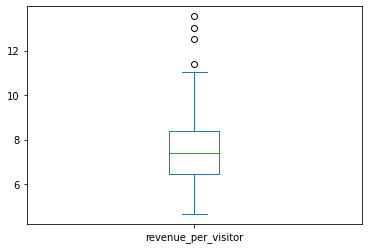

In [41]:
market_data["revenue_per_visitor"].plot(kind="box")

In [42]:
market_data[market_data["revenue_per_visitor"] > 11]

,Date,Day_Name,Visitors,Revenue,Marketing Spend,Promo,revenue_per_visitor
14,23/11/2020,Monday,2632,34278,4284.750000,Promotion Blue,13.023556
47,26/12/2020,Saturday,2678,36283,4535.375000,Promotion Blue,13.548544
48,27/12/2020,Sunday,2020,23014,2557.111111,Promotion Blue,11.393069
58,06/01/2021,Wednesday,2054,25766,2862.888889,Promotion Red,12.544304
151,09/04/2021,Friday,2158,23870,2652.222222,Promotion Blue,11.061168



Exercises with Pandas using Descriptive Statistics:

1. Load a dataset into a Pandas DataFrame and calculate the mean, median, and mode for each column.
2. Load a dataset into a Pandas DataFrame and calculate the range, variance, and standard deviation for each column.
3. Load a dataset into a Pandas DataFrame and use the `describe()` function to get summary statistics for each column.
4. Load a dataset into a Pandas DataFrame and calculate the correlation coefficient between each pair of columns.
5. Load a dataset into a Pandas DataFrame and use `groupby()` to group the data by a categorical variable, and then calculate the mean, median, and mode for each group.
6. Load a dataset into a Pandas DataFrame and use pivot tables to calculate the mean, median, and mode for each combination of two categorical variables.
7. Load a dataset into a Pandas DataFrame and use the `quantile()` function to calculate the 10th, 50th, and 90th percentiles for each column.
8. Load a dataset into a Pandas DataFrame and use the `skew()` and `kurtosis()` functions to calculate the skewness and kurtosis for each column.
9. Load a dataset into a Pandas DataFrame and use the `value_counts()` function to count the frequency of each value in a column.
10. Load a dataset into a Pandas DataFrame and use the `cut()` function to bin a continuous variable into discrete categories, and then use `groupby()` to calculate the mean, median, and mode for each group.

> Content created by **Carlos Cruz-Maldonado**.  
> Feel free to ping me at any time.